In [1]:
#coding: utf-8
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings #워닝 표시 무시
warnings.filterwarnings("ignore")

In [2]:
import requests
from bs4 import BeautifulSoup
import re

In [3]:
#크롤링할 사이트 주소 정의
source_url = "http://namu.wiki/RecentChanges"

#사이트의 html 구조에 기반하여 크롤링을 후행합니다.
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

In [4]:
#a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)
            
#중복 url을 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%EB%A6%AC%EB%B3%91%EC%B2%A0
https://namu.wiki/w/%EB%8D%B0%EB%93%9C%20%EC%95%84%EC%9D%BC%EB%9E%9C%EB%93%9C%202
https://namu.wiki/w/%ED%95%9C%EC%9E%90/%EB%AA%A9%EB%A1%9D/%EB%B6%80%EC%88%98%EB%B3%84
https://namu.wiki/w/%EB%B2%A8%EB%B2%B3%EC%BC%80%EC%9D%B4%ED%81%AC%EB%A7%9B%20%EC%BF%A0%ED%82%A4
https://namu.wiki/w/%EC%8A%88%ED%8D%BC%ED%9E%88%EC%96%B4%EB%A1%9C%20%EC%98%81%ED%99%94


In [5]:
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list) #스트링에 join 붙이면 list 형태로 추가.

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

리병철 


1948년 출생북한의 군인조선로동당 7기 정치국 상무위원조선로동당 8기 정치국 상무위원조선로동당 7기 정치국 후보위원조선로동당 중앙위원회 부위원장조선로동당 중앙위원회 비서조선로동당 군수공업부장북한 국무위원회 위원북한 국방위원회 위원


   은(는) 여기로 연결됩니다. 삼성그룹 초대회장에 대한 내용은 이병철 문서를의 번 문단을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 참고하십시오. 조선인민군의 주요 지휘관총사령관김정은최고사령부 제1부사령관리명수당 중앙군사위 부위원장리병철당 군정지도부 부장오일정총정치국장권영진총참모장박정천국방상김정관해군사령관김성길항공 및 반항공군사령관김충일전략군사령관김정길특수작전군사령관김영복사회안전상리영길국가보위상정경택총사령관김정은최고사령부 제1부사령관리명수당 중앙군사위 부위원장리병철당 군정지도부 부장오일정총정치국장권영진총참모장박정천국방상김정관해군사령관김성길항공 및 반항공군사령관김충일전략군사령관김정길특수작전군사령관김영복사회안전상리영길국가보위상정경택주: 조선인민군 육군은 별도의 총지휘관 없이 개별 군단 단위로 총참모부의 지휘를 받는다.조선로동당 정치국 상무위원 겸 비서 조선로동당 중앙군사위원회 부위원장리병철 李炳鐵 | Ri Pyong Chol출생1948년 (73세)국적 북한종교무종교 (주체사상)학력만경대혁명학원 (졸업

In [6]:
#크롤링한 데이터르 ㄹ데이터프레임으로 만들기 위해 준비.
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns = columns)

In [7]:
#각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만듭니다.
for page_url in page_urls:
    
    #사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name='article')
    title = contents_table.find_all('h1')[0]
    
    #카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all('ul')) > 0:
        category = contents_table.find_all('ul')[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    content_corpus_list = []
    
    #페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
        
    #페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체.
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append((""))
    else:
        content_corpus_list.append("")
        
    #페이지 내 카테고리정보에서 "분류"라는 단어와 개행 문자를 제거한 뒤 추출.
    #만약 없는 경우, 빈 문자열로 대체.
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
        
    #모든 정보를 하나의 데이터 프레임에 저장합니다.
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)

In [8]:
df.head()

,title,category,content_text
0,리병철,1948년 출생북한의 군인조선로동당 7기 정치국 상무위원조선로동당 8기 정치국 상무...,은(는) 여기로 연결됩니다. 삼성그룹 초대회장에 대한 내용은 이병철 문서를의 ...
1,데드 아일랜드 2,데드 아일랜드 시리즈FPS좀비 게임베이퍼웨어,데드 아일랜드 2Dead Island 2제작댐버스터 스튜디오[1]유통딥 실버플랫폼[...
2,한자/목록/부수별,한자나무위키 한자 프로젝트다중 합의/29,"상위 문서: 한자/목록 관련 문서: 한자/목록/음별, 한자/목록/획수별, ..."
3,벨벳케이크맛 쿠키,쿠키런: 킹덤/쿠키,게임 요소쿠키(특별한 인연) · 보물 · 건물(랜드마크 · 꾸미기) · 적 · 토...
4,슈퍼히어로 영화,슈퍼히어로 영화,히어로 시네마틱 유니버스마블 코믹스 기반DC 코믹스 기반1. 개요2. 역사2.1. ...


In [9]:
#텍스트 정제 함수: 한글 이외의 문자는 전부 제거.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') #한글 정규 표현식.
    result = hangul.sub('', text) #입력 받은 텍스트 필터링
    return result

In [10]:
print(text_cleaning(df['content_text'][0]))

  은는 여기로 연결됩니다 삼성그룹 초대회장에 대한 내용은 이병철 문서를의 번 문단을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 참고하십시오 조선인민군의 주요 지휘관총사령관김정은최고사령부 제부사령관리명수당 중앙군사위 부위원장리병철당 군정지도부 부장오일정총정치국장권영진총참모장박정천국방상김정관해군사령관김성길항공 및 반항공군사령관김충일전략군사령관김정길특수작전군사령관김영복사회안전상리영길국가보위상정경택총사령관김정은최고사령부 제부사령관리명수당 중앙군사위 부위원장리병철당 군정지도부 부장오일정총정치국장권영진총참모장박정천국방상김정관해군사령관김성길항공 및 반항공군사령관김충일전략군사령관김정길특수작전군사령관김영복사회안전상리영길국가보위상정경택주 조선인민군 육군은 별도의 총지휘관 없이 개별 군단 단위로 총참모부의 지휘를 받는다조선로동당 정치국 상무위원 겸 비서 조선로동당 중앙군사위원회 부위원장리병철     출생년 세국적 북한종교무종교 주체사상학력만경대혁명학원 졸업김일성군사종합대학 학사복무 항공 및 반항공군최종계급 인민군원수현직제기 최고인민회의 대의원조선로동당 중앙군사위원회 부위원장조선로동당 정치국 상무위원제기 국무위원회 위원조선로동당 중앙위원회 비서주요경력조선인민군 공군사령관년  년조선인민군 항공 및 반항공군사령관년  년조선로동당 중앙위원회 군수공업부장년  년약력제  기 최고인민회의 

In [11]:
#각 피처마다 데이터 전처리 적용.
df['title'] = df['title'].apply(lambda x : text_cleaning(x)) #해당 열 제거 후 한글만 뽑음.
df['category'] = df['category'].apply(lambda x : text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x : text_cleaning(x))
df.head()

,title,category,content_text
0,리병철,년 출생북한의 군인조선로동당 기 정치국 상무위원조선로동당 기 정치국 상무위원조선로동...,은는 여기로 연결됩니다 삼성그룹 초대회장에 대한 내용은 이병철 문서를의 번 문단...
1,데드 아일랜드,데드 아일랜드 시리즈좀비 게임베이퍼웨어,데드 아일랜드 제작댐버스터 스튜디오유통딥 실버플랫폼 장르 서...
2,한자목록부수별,한자나무위키 한자 프로젝트다중 합의,상위 문서 한자목록 관련 문서 한자목록음별 한자목록획수별 한자 목록 문서...
3,벨벳케이크맛 쿠키,쿠키런 킹덤쿠키,게임 요소쿠키특별한 인연 보물 건물랜드마크 꾸미기 적 토핑 킹덤패스 ...
4,슈퍼히어로 영화,슈퍼히어로 영화,히어로 시네마틱 유니버스마블 코믹스 기반 코믹스 기반 개요 역사 슈퍼히어로의 무덤 ...


In [12]:
#각 피처마다 말뭉치를 생성합니다.
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

리병철 데드 아일랜드  한자목록부수별 벨벳케이크맛 쿠키 슈퍼히어로 영화 인조 러시아 혁명 장인걸 시흥 버스  햣카 가사이 유노  인테르나치오날레 밀라노 시즌리그  가평 버스  한석영  한중길  렉스 루거 메가트론 류현진플레이 스타일 마리아 루스 호 사건 단다단  온라인 레벨         모드   시리즈 김원형  흑령 호텔 살인사건 마우스드라마등장인물 타노스마블 시네마틱 유니버스능력 행정구역 개편수도권기초자치단체 통합 초코보이 올 엘리트 레슬링 쟈마피 가평 버스  무스타파 세 테일즈런너역사 무극검황 제주  사건 카미조 하루카 이치오 시라카미 후부키 능비계 현대 일렉시티 유용민 한자목록획수별 적신호시 우회전   좀비 제이제로게임 한자목록음별 코로나바이러스감염증백신대한민국 최우제 진팔 설정 성모 발현 매그너 스윙 나무위키프로젝트한자성과 아르티어스 김재열  서번트아처트리스탄 꽃 피면 달 생각하고 묵향다크 스토리 시리즈 마화 이상 고온사례한국세기 이완용  쿠키런 킹덤 스타크래프트 빌드테란 더쿱 크리스토퍼 베빈스 쇼트트랙 스피드 스케이팅 프리미어 리그역대 시즌 분류묵향등장인물무림 민영하이브 소연다크 스토리 시리즈 제노 


In [13]:
from konlpy.tag import Okt
from collections import Counter

In [14]:
#Konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

In [15]:
count

Counter({'은': 120,
         '여기': 109,
         '연결': 21,
         '삼성': 101,
         '그룹': 34,
         '초대': 31,
         '회장': 28,
         '대한': 378,
         '내용': 268,
         '이병철': 9,
         '를': 545,
         '번': 1927,
         '문단': 1413,
         '의': 725,
         '부분': 332,
         '참고': 149,
         '조선인민군': 6,
         '주요': 40,
         '지휘': 24,
         '관': 58,
         '총사령관': 2,
         '김정은': 8,
         '최고사령부': 2,
         '부': 159,
         '사령관': 25,
         '리명수': 2,
         '중앙': 69,
         '사위': 7,
         '부위': 15,
         '원장': 8,
         '리병철': 5,
         '군정': 3,
         '도부': 4,
         '부장': 14,
         '오일정': 2,
         '정치국': 8,
         '권영진': 2,
         '참모': 8,
         '박정': 6,
         '국방': 19,
         '김정관': 3,
         '해군': 22,
         '김성길': 2,
         '항공': 11,
         '및': 327,
         '김충일': 2,
         '전략': 47,
         '김정길': 2,
         '특수작전군': 2,
         '김영복': 2,
         '사회': 92,
         '안전': 17,
  

In [16]:
#한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'문서': 1497, '문단': 1413, '이전': 1350, '역사': 1339, '이후': 699, '접종': 683, '때문': 641, '백신': 615, '기록': 487, '정도': 483, '이상': 462, '인조': 450, '사건': 443, '기온': 414, '자신': 393, '사람': 387, '경우': 381, '대한': 378, '선수': 360, '서울': 345, '부분': 332, '다른': 331, '시작': 327, '제대': 323, '모습': 306, '모드': 304, '사실': 302, '지역': 293, '당시': 286, '시즌': 286, '다시': 281, '경기': 276, '위해': 275, '내용': 268, '상황': 268, '한국': 257, '최고': 252, '또한': 247, '통합': 247, '정부': 246, '현재': 245, '체력': 243, '사용': 239, '가장': 238, '등장': 237, '기준': 230, '시티': 230, '문제': 229, '난이도': 228, '왕조': 223, '진출': 223, '관련': 221, '모두': 221, '고온': 220, '게임': 219, '다만': 216, '매우': 214, '사항': 214, '토론': 213, '합의': 210, '세계': 208, '생각': 205, '조선': 204, '코로나': 203, '러시아': 200, '추가': 199, '하나': 198, '평가': 198, '보스': 197, '묵향': 196, '이완용': 195, '버스': 194, '평년': 194, '유저': 190, '수준': 190, '쿠키': 185, '좀비': 184, '이름': 184, '인물': 184, '일본': 184, '대해': 178, '아르': 176, '웨이브': 176, '다년': 175, '일부': 175, '영화': 172, '능력': 172, '도입': 172, '진행': 170, '이유

In [17]:
#한국어 약식 불용어사전 예시 파일.
korean_stopwords_path = "C:/Users/tjoeun709-10/Documents/data/korean_stopwords.txt"

#텍스트 파일 오픈
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [18]:
#나무위키 페이지에 맞는 불용어 추가
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [19]:
!pip install pytagcloud pygame simplejson

In [20]:
import random
import pytagcloud
import webbrowser

pygame 2.0.1 (SDL 2.0.14, Python 3.7.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [21]:
#가장 출력 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags = remove_char_counter.most_common(40)

#pytagcloud로 출력할 40개의 단어 입력. 단어 출력의 최대 크기는 80 제한.
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

#pytagcloud 이미지 생성. 폰트는 나눔 고딕
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

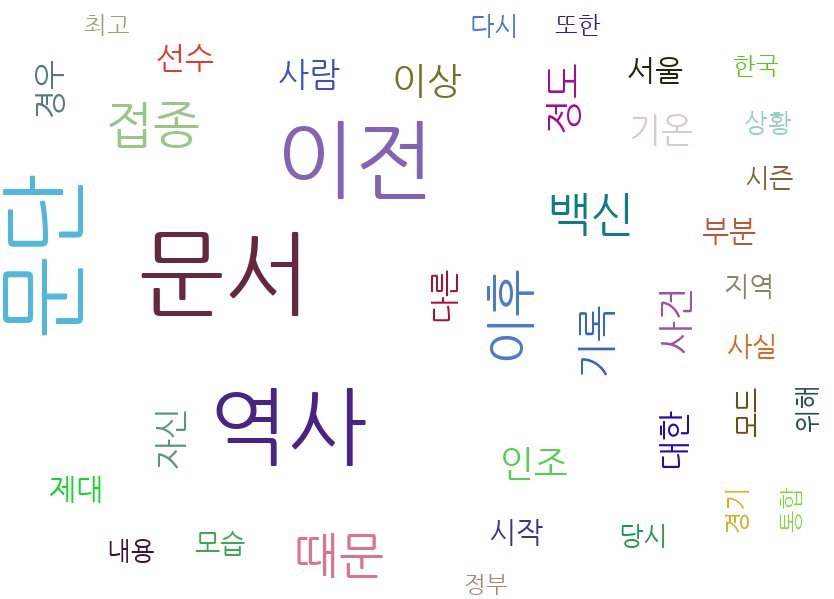

In [22]:
#생성한 이미지를 주피터 노트북상에서 출력.
from IPython.display import Image
Image(filename='wordcloud.jpg')

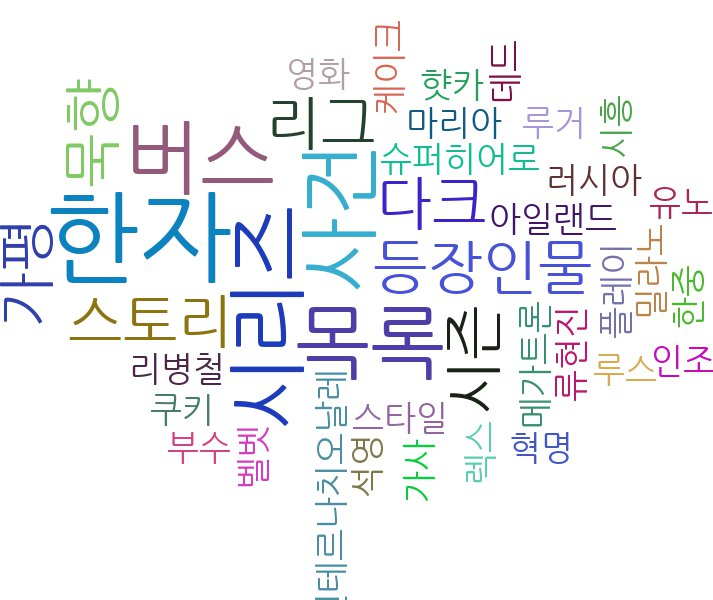

In [23]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'title_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='title_wordcloud.jpg')

In [24]:
from konlpy.tag import Okt

In [25]:
t = Okt()

In [26]:
tokens_ko = t.nouns("나는 가방에 들어갈거야..가방..가방..잔짜야..진짜..진짜..진짜..진짜..오늘은 수요일이야..오늘...마라탕은 개존맛...이민수")
tokens_ko

['나',
 '가방',
 '가방',
 '가방',
 '잔',
 '진짜',
 '진짜',
 '진짜',
 '진짜',
 '오늘',
 '수요일',
 '오늘',
 '탕',
 '개존맛',
 '이민수']

In [27]:
import nltk #자연어 처리를 위한 객체를 만들어주는 라이브러리.

In [28]:
ko = nltk.Text(tokens_ko, name='test')

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #폰트 관련 용도다.

%config InlineBackend.figure_format = 'retina'

In [30]:
import matplotlib.font_manager as fm
fontpath = 'C:/ProgramData/Anaconda3/Lib/site-packages/pytagcloud/fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name)

In [31]:
fm._rebuild() #폰트 설정 반영

In [33]:
#2-6-2. matplotlib의 한글 폰트 처리
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

#f_path = "/Library/Fonts/AppleGothic.ttf"
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

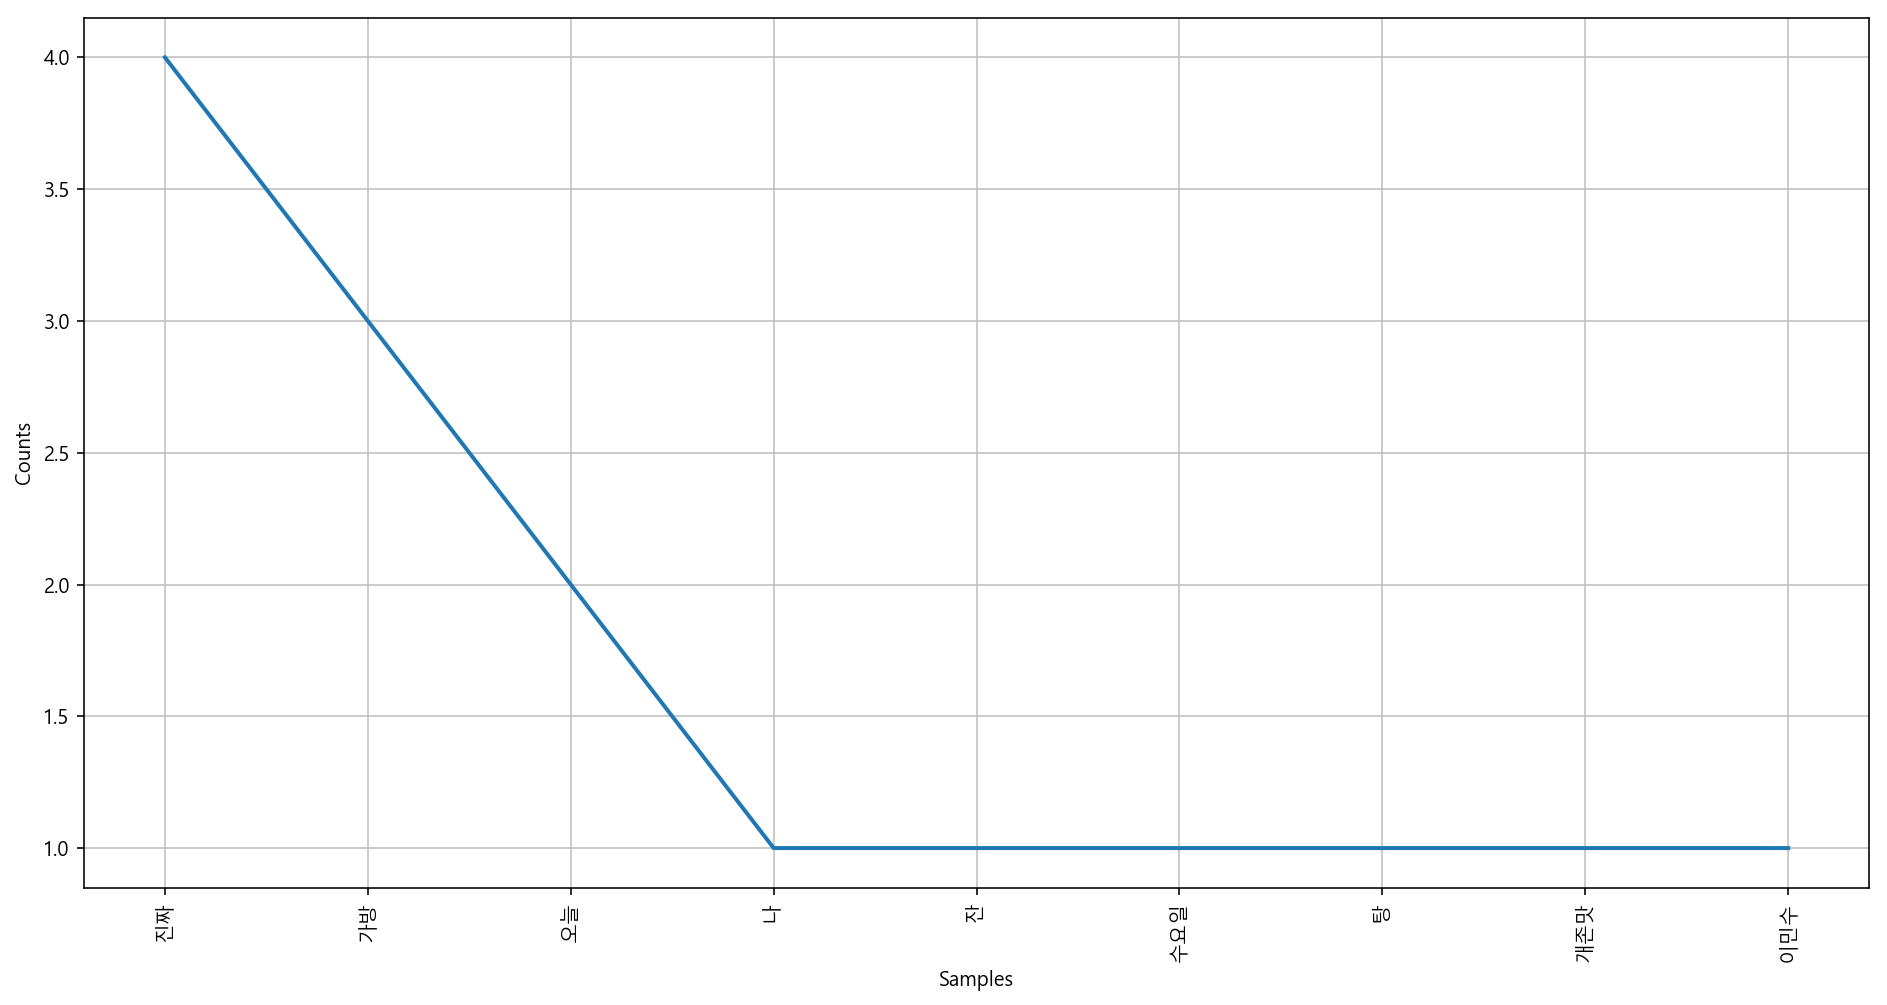

In [34]:
plt.figure(figsize=(16, 8))
ko.plot(50)
plt.show()

In [35]:
musk =  """2월 테슬라 결제 비트코인으로 →5월 환경에 악영향 끼쳐서 결제 중단
━
= 엘론 머스크 스페이스X 최고경영자(CEO).  (C) AFP=뉴스1

= 엘론 머스크 스페이스X 최고경영자(CEO). (C) AFP=뉴스1

일론 머스크 테슬라 최고경영자(CEO)가 또다시 트위터로 가상자산(암호화폐) 시장을 뒤흔들었다. 이번엔 '불장'(상승랠리)가 아니라 '찬물'이다.
13일 오전 7시30분(한국시간) 머스크는 자신의 트위터를 통해 "비트코인의 테슬라 결제를 중단한다"고 선언했다.

테슬라가 미국 증권거래위원회(SEC)에 "15억 달러 규모(1조7000억)비트코인을 구매했고 향후 테슬라 자동차 판매를 위한 결제수단으로 비트코인을 사용할 수 있도록 할 계획"이라고 밝힌지 불과 3개월만이다.

머스크가 밝힌 비트코인 결제 중단 이유는 환경 이슈다. 비트코인이 전기를 너무 많이 먹어 환경에 악영향을 미친다는 이유다.

그는 비트코인 채굴에 드는 전기로 화석연료, 특히 석탄의 사용이 급격하게 증가하고 있다며 또 암호화폐의 많은 부분에서 좋은 아이디어지만 환경에 악영향을 미친다고 주장했다.

이에 따라 테슬라는 비트코인 채굴에 지속가능한 에너지가 사용될 때가지 전기차 결제를 중단한다고 선언했다.

특히 머스크는 "우리는 비트코인 사용되는 에너지의 1% 이하를 사용하는 다른 암호화폐를 찾고 있다"며 비트코인이 아닌 다른 암호화폐로 옮길 가능성을 내비쳤다.

━
테슬라, 구매한 비트코인 매각해 1억달러 차익...머스크 "개인보유는 안팔았다" 해명에도 비판 쏟아져
━

(서울=뉴스1) 허경 기자 = 테슬라의 배터리 기술·투자 설명회인 '배터리 데이'가 하루 앞으로 다가오면서 국내 배터리 업체들도 혁신적인 기술이 대거 공개될지 숨죽이며 주목하고 있다. 한국 업체들의 강력한 경쟁자가 될 수 있다는 관측이 나오는 가운데, 장기적으로는 기회가 될 것이란 의견도 나온다.  22일 업계에 따르면 테슬라는 오는 23일 오전 5시30분(현지시간 22일 오후 1시30분) 주주총회를 개최한 직후 '배터리 데이'를 열 예정이다.사진은 이날 서울 청담동의 테슬라 매장. 2020.9.22/뉴스1

(서울=뉴스1) 허경 기자 = 테슬라의 배터리 기술·투자 설명회인 '배터리 데이'가 하루 앞으로 다가오면서 국내 배터리 업체들도 혁신적인 기술이 대거 공개될지 숨죽이며 주목하고 있다. 한국 업체들의 강력한 경쟁자가 될 수 있다는 관측이 나오는 가운데, 장기적으로는 기회가 될 것이란 의견도 나온다. 22일 업계에 따르면 테슬라는 오는 23일 오전 5시30분(현지시간 22일 오후 1시30분) 주주총회를 개최한 직후 '배터리 데이'를 열 예정이다.사진은 이날 서울 청담동의 테슬라 매장. 2020.9.22/뉴스1
머스크와 테슬라의 '뒤통수'는 이번이 처음이 아니다.
테슬라가 보유 중이던 비트코인을 몇개월만에 매각한 것으로 뒤늦게 확인되면서 이에 대한 비판이 일었다.

지난달 26일 테슬라는 실적발표와 함께 "매입했던 15억 달러 어치 비트코인 중 10%를 2억2700만달러에 매각해 1억1000만달러(1220억원) 이익을 얻었다"고 밝혔다.

당시 잭 커크혼 테슬라 최고재무책임자(CFO)"당장 이익을 위해 비트코인을 매수하지는 않았지만 필요가 있어 일부를 매각했다"고 부연했다.

앞선 2월 테슬라가 15억달러(약 1조7000억원)규모의 비트코인을 매입했다고 발표하던 당시 테슬라 측은 "향후 자산의 일부를 디지털 자산에 더 투자할 수 있다"며 "비트코인을 장기 무형자산으로 회계처리 하고 분기별로 가상화폐 보유 현황을 분석할 것"이라고 까지 밝혔다.
특히 머스크는 그동안 비트코인을 직접 홍보하고 본인을 '비트코인의 지지자'라며 주변에 비트코인 매수를 독려해왔다. 올해 초부터는 자신의 트위터 자기소개란에 비트코인이라는 단어를 넣기까지 했다.

올해 초부터 비트코인이 상승랠리는 이어가는 데는 머스크와 테슬라의 '비트코인 공개 홍보' 덕분이라는 분석이 나올 정도였다.

하지만 테슬라가 비트코인 매입을 발표하며 투자 독려를 하던 1분기 동안 비트코인 일부를 매각했다는 사실이 알려지며 머스크는 비판의 중심이 됐다. 머스크는 즉각 반박 트윗을 올려 "내가 개인적으로 보유한 비트코인은 팔지 않았다"며 "테슬라가 비트코인 일부를 매각한 것은 비트코인이 현금으로서 자산 유동성의 가치를 보유하고 있다는 점을 증명하기 위한 것"이라고 전했다.

━
머스크, 도지코인 '희망고문'…SNL에선 "내가 도지 파더(아버지)" vs 방송 끝나곤 "도지코인은 사기"
━


머스크가 최근 가장 많이 언급하는 암호화폐는 비트코인보다 도지코인이다.
도지코인은 온라인에서 인기를 끈 시바견 밈(meme) '도지'를 본 따 만들어진 암호화폐로 지난 2013년 12월 빌리마커스와 잭슨 팔머에 의해 만들어졌다.

도지코인이 유명해진 것은 일론 머스크 테슬라 최고경영자(CEO)가 도지코인을 가장 좋아하는 암호화폐 중 하나로 언급하면서다. 머스크 CEO는 도지코인을 "우리 모두의 암호화폐"라고 지칭하며 응원했다. 떄로 "작은 X(아들)를 위해 도지코인을 샀다" "도지코인을 달 위에 놓을 것" 등의 홍보성 발언을 종종 했다.

특히 지난달 미국 최대 암호화폐 거래사이트 '코인베이스'의 나스닥 상장을 앞두고 도지코인이 폭등했다. 코인베이스는 도지코인을 한 차례 거부한 바 있었다. 당시 트위터 이용자가 머스크에게 "도지코인에게 더 쉽게 접근(투자)할 수 있도록 코인베이스가 도지코인을 상장시켜야 한다고 보는가"라는 질문을 트윗으로 남겼는데 머스크가 "그렇다"고 답변을 남긴 것.

이후 70~80원대 거래되던 도지코인 가격이 급등하기 시작했다.

머스크는 며칠 뒤 또 트위터에 스페인 화가 호안 미로의 '달을 향해 짖는 개'(Dog Barking at the Moon) 사진을 게시하며 "Doge Barking at the Moon."(달은 향해 짖는 도지(개))라는 트위터를 남겼다.

꾸준히 오른 도지코인은 500원대까지 돌파했다. 지난달 27일(현지 시각) 밤 머스크가 다시금 자신의 트윗에 "도지파더(Dodgefather) SNL 5월8일"이라는 짧은 글을 남기면서 잠잠하던 도지코인은 다시 출렁이기 시작했다. 미국 NBC방송 코미디쇼 '새터데이 나이트 라이브'(SNL) 출연을 예고하는 글이었다.

하지만 정작 머스크 출연 이후 도지코인은 9일(현지시간) 한때 35% 이상 급락했다. 머스크는 SNL의 한 코너에서 자신을 '도지코인의 아버지'라 소개하며 도지코인이 "미래의 화폐", "세계를 장악할 금융수단"이라 했다.

이런 설명에도 진행자가 "그래서 사기(hustle) 아니냐"고 재차 묻자 머스크는 마지못해 대답한다는 표정으로 "맞다. 사기"라고 했다. '농담'으로 나온 발언이나 이 방송 전 73센트를 넘어서며 사상 최고가를 돌파한 도지코인 가격은 방송 후 47센트대까지 급락했다."""

In [46]:
tokens_musk = t.nouns(musk)
tokens_musk

['테슬라',
 '결제',
 '비트코인',
 '환경',
 '악',
 '영향',
 '결제',
 '중단',
 '엘론',
 '머스크',
 '스페이스',
 '최고경영자',
 '뉴스',
 '엘론',
 '머스크',
 '스페이스',
 '최고경영자',
 '뉴스',
 '론',
 '머스크',
 '테슬라',
 '최고경영자',
 '트위터',
 '가상',
 '자산',
 '암호',
 '화폐',
 '시장',
 '뒤',
 '이번',
 '불',
 '상승',
 '랠리',
 '찬물',
 '오전',
 '한국',
 '시간',
 '머스크',
 '자신',
 '트위터',
 '통해',
 '비트코인',
 '테슬라',
 '결제',
 '중단',
 '고',
 '선언',
 '테슬라',
 '미국',
 '증권',
 '거래',
 '위원회',
 '달러',
 '규모',
 '비트코인',
 '구매',
 '향후',
 '테슬라',
 '자동차',
 '판매',
 '위',
 '결제',
 '수단',
 '비트코인',
 '사용',
 '수',
 '계획',
 '불과',
 '개월',
 '머스크',
 '비트코인',
 '결제',
 '중단',
 '이유',
 '환경',
 '이슈',
 '비트코인',
 '전기',
 '환경',
 '악',
 '영향',
 '이유',
 '그',
 '비트코인',
 '채굴',
 '전기',
 '화석연료',
 '석탄',
 '사용',
 '증가',
 '또',
 '암호',
 '화폐',
 '부분',
 '아이디어',
 '환경',
 '악',
 '영향',
 '주장',
 '이',
 '테슬라',
 '비트코인',
 '채굴',
 '지속',
 '에너지',
 '사용',
 '때',
 '가지',
 '전기차',
 '결제',
 '중단',
 '선언',
 '머스크',
 '우리',
 '비트코인',
 '사용',
 '에너지',
 '이하',
 '사용',
 '다른',
 '암호',
 '화폐',
 '며',
 '비트코인',
 '다른',
 '암호',
 '화폐',
 '가능성',
 '내비',
 '테슬라',
 '구매',
 '비트코인',
 '매각',
 '차익',
 '머스크',
 '개인',
 

In [47]:
ko2 = nltk.Text(tokens_musk, name='test')

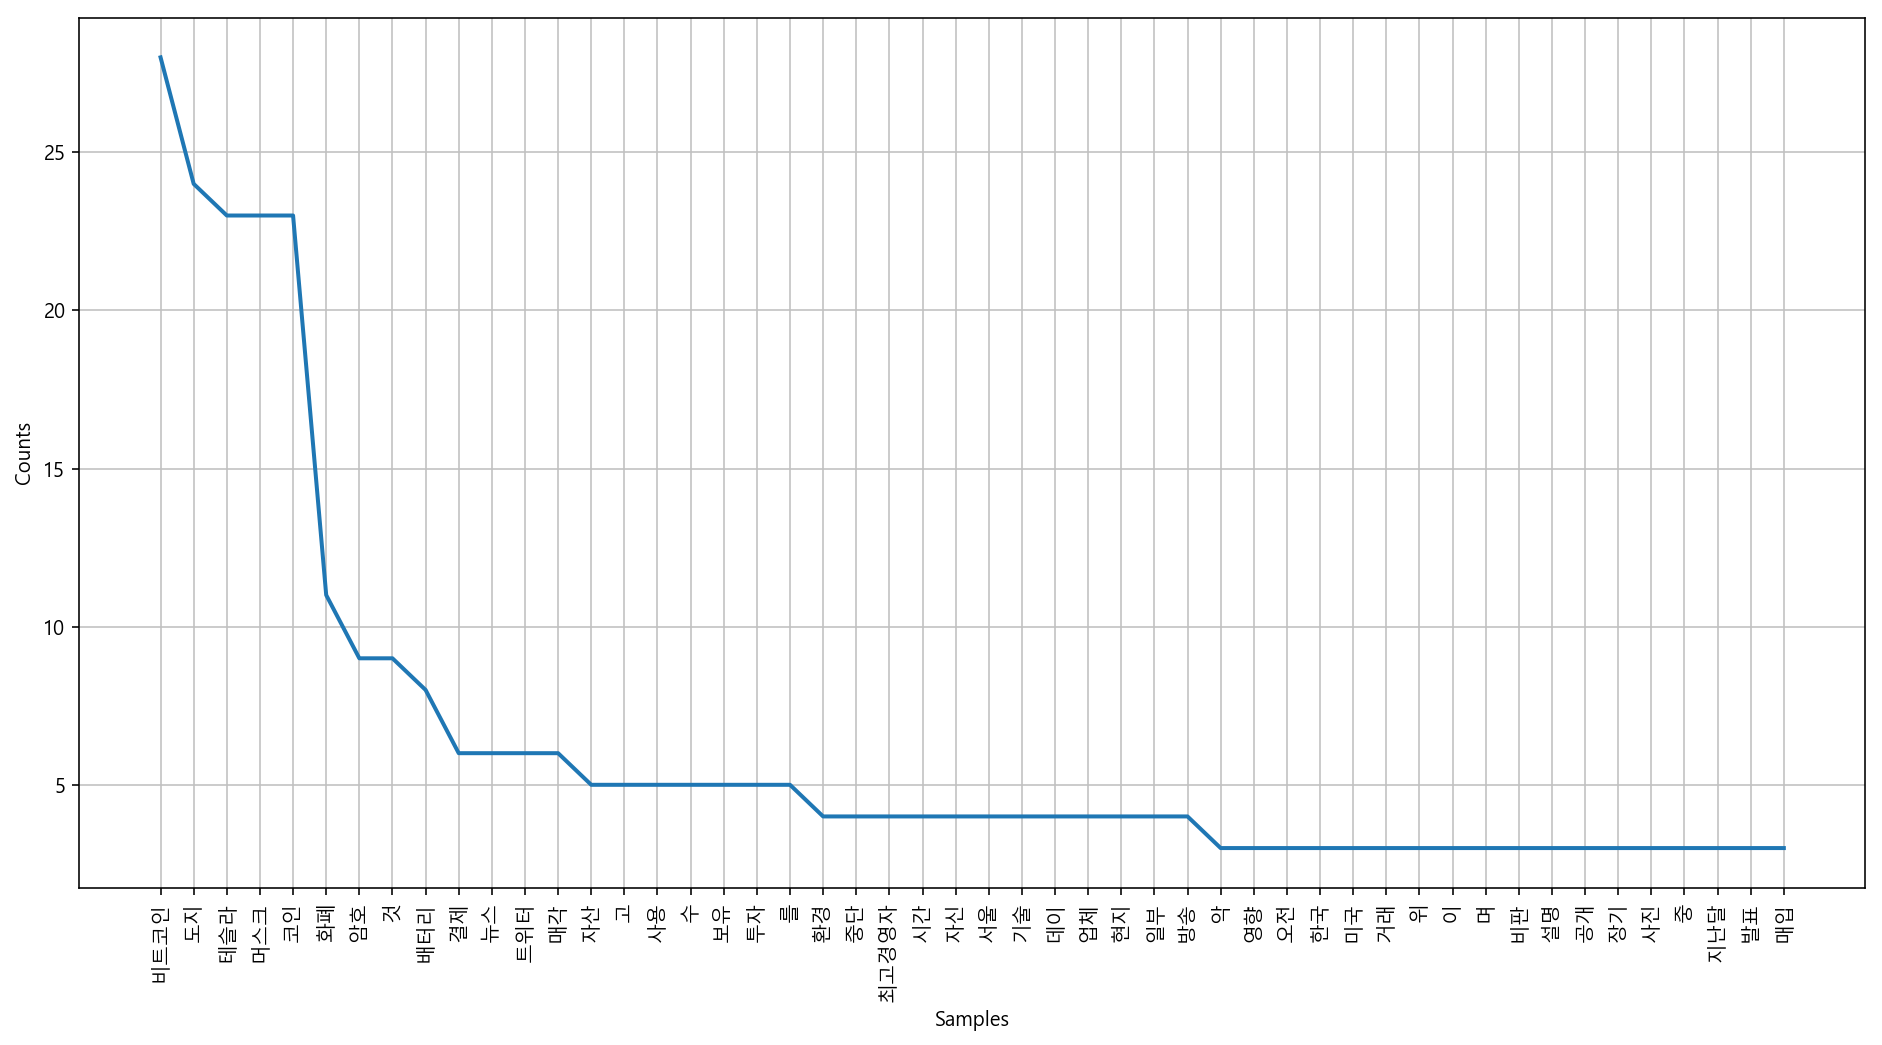

In [48]:
plt.figure(figsize=(16, 8))
ko2.plot(50)
plt.show()

In [54]:
from tqdm import tqdm_notebook
import time

total = tqdm_notebook(range(100))
for n in total:
    time.sleep(0.1)

  0%|          | 0/100 [00:00<?, ?it/s]

In [56]:
from tqdm import tqdm_notebook, tnrange
import time

for a in tqdm_notebook(range(5), desc = 'First'):
    for b in tqdm_notebook(range(100), desc = 'Second'):
        time.sleep(0.01)

First:   0%|          | 0/5 [00:00<?, ?it/s]

Second:   0%|          | 0/100 [00:00<?, ?it/s]

Second:   0%|          | 0/100 [00:00<?, ?it/s]

Second:   0%|          | 0/100 [00:00<?, ?it/s]

Second:   0%|          | 0/100 [00:00<?, ?it/s]

Second:   0%|          | 0/100 [00:00<?, ?it/s]